In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_rows = 65
pd.options.display.max_columns = 65

In [3]:
ooo = pd.read_excel('Desktop/testoutput3.xlsx', sheet_name = 'Sheet3')
example = ooo
example = pd.DataFrame({ 'Id' : ooo['Id'],  
                         'Test_Date' : ooo['Date'], 
                         'Albumin' : ooo['Albumin'], 
                         'Alkaline Phosphatase' : ooo['Alkaline Phosphatase'], 
                         'Alpha Feto- Protein' : ooo['Alpha Feto- Protein'], 
                         'Basophils' : ooo['Basophils'], 
                         'Calcium' : ooo['Calcium'], 
                         'Carcino-embryonic Antigen' : ooo['Carcino-embryonic Antigen'], 
                         'Chloride' : ooo['Chloride'], 
                         'Creatinine' : ooo['Creatinine'], 
                         'Direct Bilirubin' : ooo['Direct Bilirubin'], 
                         'E.S.R' : ooo['E.S.R'], 
                         'Eosinophils' : ooo['Eosinophils'], 
                         'Free T 4' : ooo['Free T 4'], 
                         'Gamma Glutamyltransferase' : ooo['Gamma Glutamyltransferase'], 
                         'Globulin' : ooo['Globulin'], 
                         #'Glucose' : ooo['Glucose'], 
                         'HDL Cholesterol' : ooo['HDL Cholesterol'], 
                         'Haematocrit' : ooo['Haematocrit'], 
                         'Haemoglobin' : ooo['Haemoglobin'], 
                         'HbA1c' : ooo['HbA1c'], 
                         'Hepatitis A Antibodies' : ooo['Hepatitis A Antibodies'], 
                         'Hepatitis A Antigen' : ooo['Hepatitis A Antigen'], 
                         'Hepatitis Bs Antibodies' : ooo['Hepatitis Bs Antibodies'], 
                         'Inorganic Phosphate' : ooo['Inorganic Phosphate'], 
                         'LDL Cholesterol' : ooo['LDL Cholesterol'], 
                         'Lymphocytes' : ooo['Lymphocytes'], 
                         'MCH' : ooo['MCH'], 
                         'MCHC' : ooo['MCHC'], 
                         'MCV' : ooo['MCV'], 
                         'Monocytes' : ooo['Monocytes'], 
                         'Peipheral Blood film' : ooo['Peipheral Blood film'], 
                         'Platelet' : ooo['Platelet'], 
                         'Polymorph' : ooo['Polymorph'], 
                         'Potassium' : ooo['Potassium'], 
                         'Sodium' : ooo['Sodium'], 
                         'Stool Occult Blood' : ooo['Stool Occult Blood'], 
                         'T.Chol/HDL Cholesterol Ratio' : ooo['T.Chol/HDL Cholesterol Ratio'], 
                         'TSH' : ooo['TSH'], 
                         'Total Cholesterol' : ooo['Total Cholesterol'], 
                         'Total Protein' : ooo['Total Protein'], 
                         'Total Red Cell count' : ooo['Total Red Cell count'], 
                         'Total White Cell count' : ooo['Total White Cell count'], 
                         'Triglycerides' : ooo['Triglycerides'], 
                         'Urea' : ooo['Urea'], 
                         'Uric Acid' : ooo['Uric Acid'], 
                         'Urine Bilirubin' : ooo['Urine Bilirubin'], 
                         'Urine Blood' : ooo['Urine Blood'], 
                         'Urine Casts' : ooo['Urine Casts'], 
                         'Urine Crystal' : ooo['Urine Crystal'], 
                         'Urine Epithelial cell' : ooo['Urine Epithelial cell'], 
                         'Urine Glucose' : ooo['Urine Glucose'], 
                         'Urine Ketone' : ooo['Urine Ketone'], 
                         'Urine Micro organism' : ooo['Urine Micro organism'], 
                         'Urine Nitrite' : ooo['Urine Nitrite'], 
                         'Urine PH' : ooo['Urine PH'], 
                         'Urine Protein' : ooo['Urine Protein'], 
                         'Urine Red Blood Cell' : ooo['Urine Red Blood Cell'], 
                         'Urine Urobilinogen' : ooo['Urine Urobilinogen'], 
                         'Urine White Blood cell' : ooo['Urine White Blood cell'], 
                         'Urine specific gravity' : ooo['Urine specific gravity'], 
                         'e GFR' : ooo['e GFR'], 
                         'Conclusion' : ooo['Conclusion']})

In [4]:
example.Conclusion.value_counts()

Desirable    505
Low          147
High         126
Name: Conclusion, dtype: int64

In [5]:
conLow = len(example[example['Conclusion']=='Low'])
conHigh = len(example[example['Conclusion']=='High'])
conDesirable = len(example[example['Conclusion']=='Desirable'])

pct_of_desirable = conDesirable/(conLow+conHigh+conDesirable)
print("Percentage of Desirable Glucose level is", pct_of_desirable*100)
pct_of_low = conLow/(conLow+conHigh+conDesirable)
print("Percentage of Low Glucose level is", pct_of_low*100)
pct_of_high = conHigh/(conLow+conHigh+conDesirable)
print("percentage of High Glucose level is", pct_of_high*100)

Percentage of Desirable Glucose level is 64.91002570694087
Percentage of Low Glucose level is 18.894601542416453
percentage of High Glucose level is 16.195372750642672


In [6]:
example.groupby('Conclusion').mean()

,Albumin,Alkaline Phosphatase,Alpha Feto- Protein,Basophils,Calcium,Carcino-embryonic Antigen,Chloride,Creatinine,Direct Bilirubin,E.S.R,Eosinophils,Free T 4,Gamma Glutamyltransferase,Globulin,HDL Cholesterol,Haematocrit,Haemoglobin,HbA1c,Hepatitis A Antibodies,Hepatitis A Antigen,Hepatitis Bs Antibodies,Inorganic Phosphate,LDL Cholesterol,Lymphocytes,MCH,MCHC,MCV,Monocytes,Peipheral Blood film,Platelet,Polymorph,Potassium,Sodium,Stool Occult Blood,T.Chol/HDL Cholesterol Ratio,TSH,Total Cholesterol,Total Protein,Total Red Cell count,Total White Cell count,Triglycerides,Urea,Uric Acid,Urine Bilirubin,Urine Blood,Urine Casts,Urine Crystal,Urine Epithelial cell,Urine Glucose,Urine Ketone,Urine Micro organism,Urine Nitrite,Urine PH,Urine Protein,Urine Red Blood Cell,Urine Urobilinogen,Urine White Blood cell,Urine specific gravity,e GFR
Conclusion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Desirable,4.276309,67.852941,2.675048,0.546512,9.271131,2.200521,104.575676,0.806897,0.776917,24.164835,3.189406,14.114508,34.659631,3.022039,55.410377,42.023256,13.636434,NaN,0.0,0.0,0.0,3.428060,132.555556,33.468734,29.330749,32.630491,90.108527,7.767959,0.0,270.077519,55.027390,3.930270,139.972973,0.0,4.019245,1.922421,211.313679,7.298347,4.678109,6.665633,120.948113,27.305211,5.595320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.246637,0.0,0.0,0.0,0.0,1.015493,2.424324
High,4.262162,85.088889,3.569545,0.619643,9.320513,3.108696,103.372549,0.867213,0.807727,24.076923,2.489286,15.408000,65.622222,2.994595,51.246377,42.375000,13.775439,6.3,0.0,0.0,0.0,3.407692,134.579710,32.550000,29.339286,32.642857,90.071429,6.832143,0.0,255.553571,57.508929,4.130769,139.549020,0.0,4.419565,6.011197,219.405797,7.256757,4.717143,8.044643,169.811594,29.311475,6.021154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.764706,0.0,0.0,0.0,0.0,1.017794,5.306122
Low,4.292308,70.095238,3.734000,0.553488,9.550000,1.320000,104.181818,0.800000,0.795238,32.421053,2.195349,15.695581,54.333333,3.130769,52.000000,37.790698,12.186047,NaN,0.0,0.0,0.0,3.250000,137.583333,27.748837,27.837209,32.325581,85.906977,7.553488,0.0,313.697674,61.948837,4.354545,139.545455,0.0,4.181667,3.680966,211.916667,7.423077,4.399302,9.062791,113.750000,27.444444,6.992308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.416667,0.0,0.0,0.0,0.0,1.015556,0.000000


In [7]:
example.groupby('Conclusion').min()

,Id,Test_Date,Albumin,Alkaline Phosphatase,Alpha Feto- Protein,Basophils,Calcium,Carcino-embryonic Antigen,Chloride,Creatinine,Direct Bilirubin,E.S.R,Eosinophils,Free T 4,Gamma Glutamyltransferase,Globulin,HDL Cholesterol,Haematocrit,Haemoglobin,HbA1c,Hepatitis A Antibodies,Hepatitis A Antigen,Hepatitis Bs Antibodies,Inorganic Phosphate,LDL Cholesterol,Lymphocytes,MCH,MCHC,MCV,Monocytes,Peipheral Blood film,Platelet,Polymorph,Potassium,Sodium,Stool Occult Blood,T.Chol/HDL Cholesterol Ratio,TSH,Total Cholesterol,Total Protein,Total Red Cell count,Total White Cell count,Triglycerides,Urea,Uric Acid,Urine Bilirubin,Urine Blood,Urine Casts,Urine Crystal,Urine Epithelial cell,Urine Glucose,Urine Ketone,Urine Micro organism,Urine Nitrite,Urine PH,Urine Protein,Urine Red Blood Cell,Urine Urobilinogen,Urine White Blood cell,Urine specific gravity,e GFR
Conclusion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Desirable,003d25e3fac5a1d2aa4ba502ffb77b5b,2016-01-07,3.1,30.0,0.0,0.0,8.3,0.00,96.0,0.5,0.24,2.0,0.0,8.34,7.0,2.0,15.0,28.0,7.0,NaN,0.0,0.0,0.0,1.9,46.0,10.7,18.0,29.0,61.0,3.5,0.0,101.0,31.3,3.1,130.0,0.0,1.97,0.0,122.0,6.1,2.96,2.7,29.0,11.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.005,0.0
High,020971cfb58c7bc5efaf56eac237eeef,2016-01-05,3.8,33.0,0.0,0.1,7.5,0.73,99.0,0.6,0.34,5.0,0.0,0.00,11.0,1.9,28.0,28.0,8.4,5.2,0.0,0.0,0.0,2.8,34.0,7.5,20.0,29.0,69.0,3.1,0.0,149.0,34.2,3.3,135.0,0.0,2.49,0.0,122.0,6.1,3.44,3.8,71.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.005,0.0
Low,00d64d073ff05912189aa31bf8ce5d17,2016-01-13,3.6,41.0,0.0,0.1,9.4,0.00,101.0,0.7,0.28,9.0,0.1,0.00,12.0,2.4,37.0,25.0,7.6,NaN,0.0,0.0,0.0,3.0,73.0,3.7,19.0,28.0,61.0,2.9,0.0,164.0,35.4,3.4,135.0,0.0,3.21,0.0,146.0,6.6,2.98,3.7,79.0,14.0,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.005,0.0


In [8]:
example.groupby('Conclusion').max()

,Id,Test_Date,Albumin,Alkaline Phosphatase,Alpha Feto- Protein,Basophils,Calcium,Carcino-embryonic Antigen,Chloride,Creatinine,Direct Bilirubin,E.S.R,Eosinophils,Free T 4,Gamma Glutamyltransferase,Globulin,HDL Cholesterol,Haematocrit,Haemoglobin,HbA1c,Hepatitis A Antibodies,Hepatitis A Antigen,Hepatitis Bs Antibodies,Inorganic Phosphate,LDL Cholesterol,Lymphocytes,MCH,MCHC,MCV,Monocytes,Peipheral Blood film,Platelet,Polymorph,Potassium,Sodium,Stool Occult Blood,T.Chol/HDL Cholesterol Ratio,TSH,Total Cholesterol,Total Protein,Total Red Cell count,Total White Cell count,Triglycerides,Urea,Uric Acid,Urine Bilirubin,Urine Blood,Urine Casts,Urine Crystal,Urine Epithelial cell,Urine Glucose,Urine Ketone,Urine Micro organism,Urine Nitrite,Urine PH,Urine Protein,Urine Red Blood Cell,Urine Urobilinogen,Urine White Blood cell,Urine specific gravity,e GFR
Conclusion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Desirable,ffa1c31426a5f26e26860382fc9ae454,2017-12-30,4.9,181.0,12.23,1.0,10.5,26.49,111.0,2.4,2.15,98.0,28.5,58.86,1196.0,4.5,106.0,58.0,18.2,NaN,0.0,0.0,0.0,5.3,274.0,54.5,37.0,37.0,108.0,21.4,0.0,511.0,85.5,5.8,145.0,0.0,14.00,71.3886,343.0,9.0,7.02,15.4,622.0,103.0,11.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.030,59.0
High,fefc6f00ed7fbdb16500adc7e2b60df4,2018-04-10,4.7,267.0,8.24,1.0,10.2,8.82,108.0,1.4,1.65,57.0,7.5,53.04,447.0,3.5,77.0,51.0,16.8,7.4,0.0,0.0,0.0,4.8,243.0,57.4,34.0,34.0,103.0,13.8,0.0,463.0,88.9,7.1,145.0,0.0,7.51,142.2240,350.0,8.1,6.12,26.9,396.0,55.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,0.0,0.0,0.0,1.030,60.0
Low,fea312cfb0bfe026c03a8ad8fdfe8a83,2017-12-28,4.6,131.0,12.27,1.0,9.7,2.87,107.0,0.9,1.89,104.0,6.3,74.43,488.0,4.8,75.0,52.0,16.4,NaN,0.0,0.0,0.0,3.5,194.0,53.3,33.0,35.0,98.0,13.0,0.0,660.0,89.9,5.7,142.0,0.0,5.81,88.9940,279.0,9.2,5.83,31.6,186.0,37.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,0.0,0.0,0.0,1.025,0.0


In [9]:
# feature_names does not include Glucose
feature_names = ['Albumin', 'Alkaline Phosphatase', 'Alpha Feto- Protein', 'Basophils', 'Calcium', 'Carcino-embryonic Antigen', 'Chloride', 'Creatinine', 'Direct Bilirubin', 'E.S.R', 'Eosinophils', 'Free T 4', 'Gamma Glutamyltransferase', 'Globulin', 'HDL Cholesterol', 'Haematocrit', 'Haemoglobin', 'HbA1c', 'Hepatitis A Antibodies', 'Hepatitis A Antigen', 'Hepatitis Bs Antibodies', 'Inorganic Phosphate', 'LDL Cholesterol', 'Lymphocytes', 'MCH', 'MCHC', 'MCV', 'Monocytes', 'Peipheral Blood film', 'Platelet', 'Polymorph', 'Potassium', 'Sodium', 'Stool Occult Blood', 'T.Chol/HDL Cholesterol Ratio', 'TSH', 'Total Cholesterol', 'Total Protein', 'Total Red Cell count', 'Total White Cell count', 'Triglycerides', 'Urea', 'Uric Acid', 'Urine Bilirubin', 'Urine Blood', 'Urine Casts', 'Urine Crystal', 'Urine Epithelial cell', 'Urine Glucose', 'Urine Ketone', 'Urine Micro organism', 'Urine Nitrite', 'Urine PH', 'Urine Protein', 'Urine Red Blood Cell', 'Urine Urobilinogen', 'Urine White Blood cell', 'Urine specific gravity', 'e GFR']

X = example[feature_names].notnull()
y = example['Conclusion']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = example[feature_names].notnull()
y = example['Conclusion']

C:\Users\L30907\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg .score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.61


C:\Users\L30907\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\L30907\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [11]:
# Larger number (irregardless of +/-) = Most importance
logreg.coef_

array([[ 0.24772145, -0.12956671, -0.49786498,  0.05261559,  0.16090196,
         0.60103851, -0.22103442,  0.39534078,  0.31250292,  0.53485524,
         0.05261559,  0.31449103,  0.22217542,  0.24772145,  0.39320498,
         0.05261559, -0.19923885, -0.39406008, -0.56809264, -0.29454301,
         0.31924623,  0.03691664, -0.17655548,  0.05261559,  0.05261559,
         0.05261559,  0.05261559,  0.05261559, -0.35537449,  0.05261559,
         0.05261559, -0.22103442, -0.22103442, -0.49804881,  0.39320498,
         0.143818  ,  0.39320498,  0.24772145,  0.05261559,  0.05261559,
         0.39320498, -0.25671103,  1.07730071,  0.03676949,  0.03676949,
         0.03676949,  0.03676949,  0.03676949,  0.03676949,  0.03676949,
         0.03676949,  0.03676949,  0.03676949,  0.03676949,  0.03676949,
         0.03676949,  0.03676949,  0.03676949, -0.25884024],
       [-0.61477063,  0.50550383,  0.39673653, -0.08012005,  0.781021  ,
         0.63493371,  0.31238791,  0.05540267, -0.13088468, -0.

In [12]:
# Sort based on Most importance of Low
coefs = np.abs(logreg.coef_[0])
indicesDesirable = np.argsort(coefs)[::-1]
indicesDesirable

array([42,  5, 18,  9, 33,  2,  7, 17, 34, 40, 36, 14, 28, 20, 11,  8, 19,
       58, 41, 37, 13,  0, 12, 32, 31,  6, 16, 22,  4, 35,  1, 38,  3, 10,
       15, 29, 23, 39, 24, 25, 26, 30, 27, 21, 53, 56, 43, 55, 57, 54, 51,
       52, 44, 50, 49, 48, 46, 45, 47], dtype=int32)

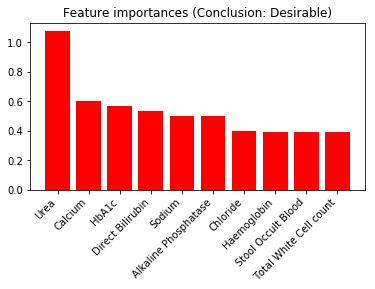

In [13]:
# Indices starts from 0

plt.figure()
plt.title("Feature importances (Conclusion: Desirable)")
plt.bar(range(10), coefs[indicesDesirable[:10]], color="r", align="center")
plt.xticks(range(10), X.columns[indicesDesirable[:10]-1], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [14]:
# Sort based on Most importance of High
coefs = np.abs(logreg.coef_[1])
indicesHigh = np.argsort(coefs)[::-1]
indicesHigh

array([42, 21,  4, 35, 28,  5, 13, 37,  0,  9, 17, 16, 11,  1, 12,  2, 22,
        6, 31, 32, 41, 20, 19, 33, 58,  8, 29, 26, 10, 23, 24, 25, 27, 39,
        3, 30, 38, 15,  7, 18, 36, 14, 34, 40, 46, 45, 48, 49, 50, 44, 51,
       43, 52, 53, 54, 57, 55, 56, 47], dtype=int32)

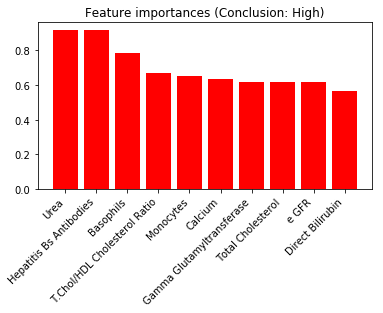

In [15]:
# Indices starts from 0
# Hepatitis Bs Antibodies are all 0 (Ignore)

plt.figure()
plt.title("Feature importances (Conclusion: High)")
plt.bar(range(10), coefs[indicesHigh[:10]], color="r", align="center")
plt.xticks(range(10), X.columns[indicesHigh[:10]-1], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [16]:
# Sort based on Most importance of Desirable
coefs = np.abs(logreg.coef_[2])
indicesLow = np.argsort(coefs)[::-1]
indicesLow

array([ 5,  4, 21,  7, 28, 33, 18, 41, 19, 40, 34, 36, 14, 42, 35, 22, 16,
       58, 37, 13,  0,  1, 20, 12,  9,  2, 17,  8, 11, 50, 52, 51, 49, 48,
       47, 54, 55, 56, 46, 57, 45, 44, 43, 53, 10,  3, 38, 15, 39, 23, 24,
       25, 26, 27, 30, 29,  6, 31, 32], dtype=int32)

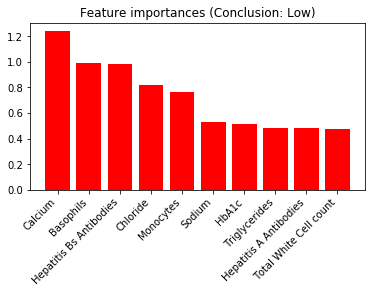

In [17]:
# Indices starts from 0

plt.figure()
plt.title("Feature importances (Conclusion: Low)")
plt.bar(range(10), coefs[indicesLow[:10]], color="r", align="center")
plt.xticks(range(10), X.columns[indicesLow[:10]-1], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[93  5 23]
 [21  2 16]
 [ 9  2 24]]
              precision    recall  f1-score   support

   Desirable       0.76      0.77      0.76       121
        High       0.22      0.05      0.08        39
         Low       0.38      0.69      0.49        35

   micro avg       0.61      0.61      0.61       195
   macro avg       0.45      0.50      0.45       195
weighted avg       0.58      0.61      0.58       195



In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.81
Accuracy of Decision Tree classifier on test set: 0.65


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.62


In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.77
Accuracy of LDA classifier on test set: 0.62


C:\Users\L30907\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.71
Accuracy of GNB classifier on test set: 0.61


In [23]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

C:\Users\L30907\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.76
Accuracy of SVM classifier on test set: 0.63
